In [297]:
# Video games are sold all over the world which produces a large amount of data on user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. The goal of this project is to identify patterns that determine whether a game succeeds or not. This will allow identification of potential big winners and which games to plan advertising campaigns for. 

In [298]:
# Import packages needed for analysis of data
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt 

In [299]:
# Print info of DataFrame to get all attributes of table at once
DF = pd.read_csv("dataset.csv")
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [300]:
# Rename column names to contain only lowercase letters
DF = DF.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

# Verify the change
print(DF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [301]:
# Change the 'user_score' column from object to float to be able to conduct mathematical equations (ex: mean score, min score, max score, std score)
DF['user_score'] = pd.to_numeric(DF['user_score'], errors='coerce')

# Verify the change
print(DF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


In [302]:
# Due to such a large dataset, it is not practical to display all the rows, thus we will print the first and last 5 rows.
# Print the first 5 rows for a small sample of data to give a quick snapshot of the structure of the dataset.
print(DF.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  


In [303]:
# Print last 5 rows for another sample of data to check if there are any special cases, outliers, or null values that weren't visible at the beginning.
print(DF.tail(5))

                                name platform  year_of_release       genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16710      0.00      0.00      0.01          0.0           NaN         NaN   
16711      0.00      0.01      0.00          0.0           NaN         NaN   
16712      0.00      0.00      0.01          0.0           NaN         NaN   
16713      0.01      0.00      0.00          0.0           NaN         NaN   
16714      0.00      0.00      0.01          0.0           NaN         NaN   

      rating  
16710    NaN  
16711    NaN  
16712    NaN  
16

In [304]:
# Find the total of missing values for each column
print(DF.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [305]:
# Make sure there are no TBD values for any of the columns before starting to assess missing values individually
value = DF.get('TBD', 'default_value')  # Returns 'default_value' if 'TBD' does not exist
print(value)

default_value


In [306]:
# Check to see if the missing values for the games with no names is significant enough to keep in the dataset
missing_specific_name = DF[DF['name'].isnull()]
print(missing_specific_name)

# Because there are sales for the games with no names, will not drop them from the data set so as to have a more accurate analysis later on
# The names could be missing, again, due to human error with information entry and source limitations if the data was collected from multiple platforms and databases

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [307]:
# Will change NaN to N/A for the 2 games with no names to maintain consistency and good practice
DF['name'] = DF['name'].fillna('N/A')

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [308]:
# Check to see if the year might be in the name of the game, if so we can use that information in a loop to place it in the year_of_release column
missing_specific_year= DF[DF['year_of_release'].isnull()]
print(missing_specific_year)

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

In [309]:
# We now know there are a few games that have the year in the game title

# Loop through each row to extract year and update the year_of_release column
for index, row in DF.iterrows():
    game_name = row['name']
    if isinstance(game_name, str):  # Check if game_name is a string
        match = re.search(r'\b(\d{4})\b', game_name)
        if match:
            DF.at[index, 'year_of_release'] = str(match.group(1))  # Convert to string

# Display the DataFrame
print(DF)

                                name platform year_of_release         genre  \
0                         Wii Sports      Wii          2006.0        Sports   
1                  Super Mario Bros.      NES          1985.0      Platform   
2                     Mario Kart Wii      Wii          2008.0        Racing   
3                  Wii Sports Resort      Wii          2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB          1996.0  Role-Playing   
...                              ...      ...             ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.0        Action   
16711               LMA Manager 2007     X360            2007        Sports   
16712        Haitaka no Psychedelica      PSV          2016.0     Adventure   
16713               Spirits & Spells      GBA          2003.0      Platform   
16714            Winning Post 8 2016      PSV            2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  c

In [310]:
# Check to see how many missing values we now have in the year_of_release column
print(DF.isnull().sum())

name                  0
platform              0
year_of_release     252
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [311]:
# There could be multiple reasons as to why there is no information for the year_of_release, including: incorrect data entry due to human error, inconsistent formatting across datasets, and source limitations if the data was compiled from multiple platforms or databases
# Will change NaN values in year_of_release to 0 to create a default year, this will allow us to still conduct analysis later on
DF['year_of_release'] = DF['year_of_release'].fillna(0)

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [312]:
# Evaluate the missing values in the genre column
missing_specific_genre = DF[DF['genre'].isnull()]
print(missing_specific_genre)

      name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    N/A      GEN          1993.0   NaN      1.78      0.53      0.00   
14244  N/A      GEN          1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [313]:
# There are only two missing values from the genre column, this could be due to incomplete data entry or lack of genre classification
# To maintain consistency and good practice, will fill the missing values for the genre column with N/A

DF['genre'] = DF['genre'].fillna('N/A')

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [314]:
# Evaluate the missing critic_score column 
missing_specific_critic = DF[DF['critic_score'].isnull()]
print(missing_specific_critic)

                                name platform year_of_release         genre  \
1                  Super Mario Bros.      NES          1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB          1996.0  Role-Playing   
5                             Tetris       GB          1989.0        Puzzle   
9                          Duck Hunt      NES          1984.0       Shooter   
10                        Nintendogs       DS          2005.0    Simulation   
...                              ...      ...             ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.0        Action   
16711               LMA Manager 2007     X360            2007        Sports   
16712        Haitaka no Psychedelica      PSV          2016.0     Adventure   
16713               Spirits & Spells      GBA          2003.0      Platform   
16714            Winning Post 8 2016      PSV            2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  c

In [315]:
# There are quite a few games with a missing value, this could be due to lack of reviews (game did not receive enough reviews resulting in missing scores), new releases (this would mean there have not been any reviews yet), and/or censorship/restritctions (some platforms or publications may choose to not provide scores due to content concerns or company policies).
# Even though there is a vast array of games with missing values for critic_score, we will not drop these but rather fill with N/A for further evaluation and analysis later.
DF['critic_score'] = DF['critic_score'].fillna('N/A')

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9125
rating             6766
dtype: int64


In [316]:
# Evaluate the missing values for user_score
missing_specific_user = DF[DF['user_score'].isnull()]
print(missing_specific_user)

                                name platform year_of_release         genre  \
1                  Super Mario Bros.      NES          1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB          1996.0  Role-Playing   
5                             Tetris       GB          1989.0        Puzzle   
9                          Duck Hunt      NES          1984.0       Shooter   
10                        Nintendogs       DS          2005.0    Simulation   
...                              ...      ...             ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.0        Action   
16711               LMA Manager 2007     X360            2007        Sports   
16712        Haitaka no Psychedelica      PSV          2016.0     Adventure   
16713               Spirits & Spells      GBA          2003.0      Platform   
16714            Winning Post 8 2016      PSV            2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales cr

In [317]:
# There are a lot of missing values for the user_score column, this could be due to, again, games being new releases so there are no reviews yet, data entry errors, and/or user rating systems vary significantly (some users might choose to not rate a game and thus leaving empty values)
# Due to possible further evaluation and analysis of user_score column later, we will not drop these columns but rather fill the N/A (also for consistency and good practice)
DF['user_score'] = DF['user_score'].fillna('N/A')

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64


In [318]:
# Evaluate the missing ESRB (The Entertainment Software Rating Board [this board evaluates a game's content and assigns an age rating, i.e. Teen or Mature]) ratings for games
missing_specific_rating = DF[DF['rating'].isnull()]

print(missing_specific_rating)

                                name platform year_of_release         genre  \
1                  Super Mario Bros.      NES          1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB          1996.0  Role-Playing   
5                             Tetris       GB          1989.0        Puzzle   
9                          Duck Hunt      NES          1984.0       Shooter   
10                        Nintendogs       DS          2005.0    Simulation   
...                              ...      ...             ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.0        Action   
16711               LMA Manager 2007     X360            2007        Sports   
16712        Haitaka no Psychedelica      PSV          2016.0     Adventure   
16713               Spirits & Spells      GBA          2003.0      Platform   
16714            Winning Post 8 2016      PSV            2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales cr

In [319]:
# There are many missing values for the rating column, this could be due to games being older or legacy games (older titles released before the ESRB was established in 1994 may lack an official rating), some might not have been submitted for ESRB rating as well as choosing to remain unrated to avoid specific classifications, and/or data inconsistencies or errors when collecting the data
# Just to remain consistent with all missing values, NaN will be replaced with N/A for the rating column
DF['rating'] = DF['rating'].fillna('N/A')

# Verify the changes
print(DF.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [320]:
# Need to calculate the total sales (the sum of sales for all regions) for each game and put these values in a separate column within the table
# First calculate the total sales
DF['total_sales'] = DF['na_sales'] + DF['eu_sales'] + DF['jp_sales'] + DF['other_sales']

# Group by 'name' and calculate the total sales per game and add back to main dataframe
num_sales = DF.groupby('name')['total_sales'].sum().reset_index()

# Verify the changes
print(DF)

                                name platform year_of_release         genre  \
0                         Wii Sports      Wii          2006.0        Sports   
1                  Super Mario Bros.      NES          1985.0      Platform   
2                     Mario Kart Wii      Wii          2008.0        Racing   
3                  Wii Sports Resort      Wii          2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB          1996.0  Role-Playing   
...                              ...      ...             ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.0        Action   
16711               LMA Manager 2007     X360            2007        Sports   
16712        Haitaka no Psychedelica      PSV          2016.0     Adventure   
16713               Spirits & Spells      GBA          2003.0      Platform   
16714            Winning Post 8 2016      PSV            2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales cr

In [321]:
# How many games were released in different years
yearly_game_sales = DF.groupby('year_of_release')['name'].count()
print(yearly_game_sales)

year_of_release
0         252
1980.0      9
1981.0     46
1982.0     36
1983.0     17
         ... 
2142        1
2205        1
2500        5
2600        1
3000        1
Name: name, Length: 88, dtype: int64


In [322]:
#This data shows games for years that have not happened yet, we need to focus on games that have already been released
DF['year_of_release'] = DF['year_of_release'].astype(float).astype('Int64')
filtered_games = DF[(DF['year_of_release'] >= 1980) & (DF['year_of_release'] < 2018)]
yearly_counts = filtered_games['year_of_release'].value_counts().sort_index()
print(yearly_counts)

# While there are games that are counted for years that do not exist (most likely an error in data input/collection) and games with no years attached to them; it is important to note there is a clear pattern of growth from 1980 to 2009. This would correlate with the development of technology and new gaming systems being produced and distributed globally. 
# The sudden decrease in game sales starting in 2010 can be a reflection of global economic patterns due to the 2008 Global Financial Crisis. 
# The Global Financial Crisis started in the U.S. (correlates to the na_sales column) with the collapse of the housing bubble, and multiple financial institutions claiming bankruptcies which lead to government bailouts. 
# Europe (correlates to the eu_sales column) was significantly affected due to the strong financial ties with the U.S. which led to a recession in several European countries. 
# Japan's (correlates to the jp_sales column) economy was already in a long term stagnation period, but the Global Financial Crisis worsened issues like deflation and low economic growth. 
# The rapid decrease in sales could possibly be attributed to the financial recovery of the 2008 Global Financial Crisis. 

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      13
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      42
1993      62
1994     120
1995     218
1996     261
1997     289
1998     364
1999     308
2000     365
2001     472
2002     831
2003     768
2004     762
2005     977
2006     997
2007    1182
2008    1424
2009    1420
2010    1254
2011    1136
2012     661
2013     537
2014     584
2015     602
2016     501
2017      16
Name: count, dtype: Int64


In [327]:
# How sales varied from platform to platform (sales are in USD million)
game_platform_count = DF.groupby('platform')['total_sales'].count()
print(game_platform_count.sort_values())

platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii     1320
PS3     1331
DS      2151
PS2     2161
Name: total_sales, dtype: int64


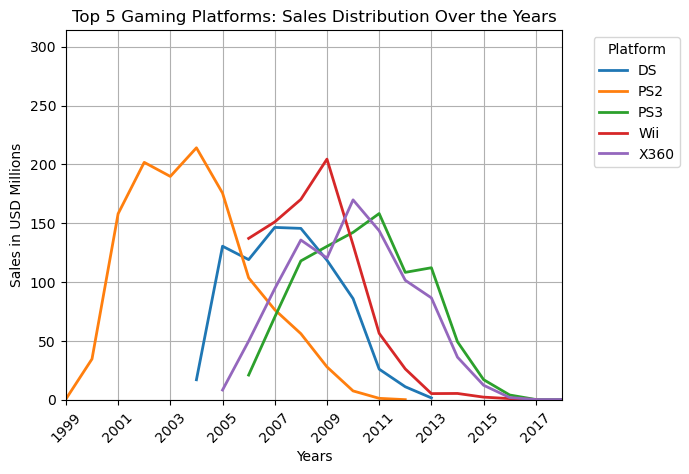

In [325]:
# Taking the top 5 platforms and creating a distribution based off total sales per year

# Calculate total sales for each platform
total_sales_per_platform = DF.groupby('platform')['total_sales'].sum()

# Get the top 5 platforms by total sales
top_5_platforms = total_sales_per_platform.nlargest(5).index

# Filter the DF to include only the top 5 platforms
DF_top5 = DF[DF['platform'].isin(top_5_platforms)]

# Pivot filtered data to get platforms as columns
platform_sales_top5 = DF_top5.pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')

# Plotting each platform
ax = platform_sales_top5.plot(
    kind='line',
    xlim=[1999, 2018],  # Setting the range for years
    ylim=[0, platform_sales_top5.max().max() + 100],  # Setting the range for sales in millions
    grid=True,
    linewidth=2, # Optional: line width for better visibility
)

plt.xticks(range(1999,2019,2), rotation=45)

plt.title("Top 5 Gaming Platforms: Sales Distribution Over the Years")
plt.xlabel("Years")
plt.ylabel("Sales in USD Millions")
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [336]:
# Find the lifespan of platforms that used to be popular and now have no sales


3000
